In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("~/Desktop/MLfinal/2020q1NEW.csv")


In [4]:
df

,Unnamed: 0,STATION ID,TIME,CHANGE,Year,Month,Day,Weekday,Hour
0,0,69,2020-01-01 06:00:00,0.534522,2020,1,1,Wednesday,6
1,1,69,2020-01-01 07:00:00,0.492366,2020,1,1,Wednesday,7
2,2,69,2020-01-01 08:00:00,0.514929,2020,1,1,Wednesday,8
3,3,69,2020-01-01 09:00:00,0.522233,2020,1,1,Wednesday,9
4,4,69,2020-01-01 10:00:00,0.389249,2020,1,1,Wednesday,10
...,...,...,...,...,...,...,...,...,...
6601,6601,98,2020-04-01 19:00:00,0.000000,2020,4,1,Wednesday,19
6602,6602,98,2020-04-01 20:00:00,0.000000,2020,4,1,Wednesday,20
6603,6603,98,2020-04-01 21:00:00,0.000000,2020,4,1,Wednesday,21
6604,6604,98,2020-04-01 22:00:00,0.000000,2020,4,1,Wednesday,22


In [33]:
data = df
data['Name'] = data['STATION ID'].replace({69: 'Grand Canal Dock', 75: 'Frederick St South', 98: 'James St'})
data = data.drop(columns = "Unnamed: 0")
Data = data
data

,STATION ID,TIME,CHANGE,Year,Month,Day,Weekday,Hour,Name
0,69,2020-01-01 06:00:00,0.534522,2020,1,1,Wednesday,6,Grand Canal Dock
1,69,2020-01-01 07:00:00,0.492366,2020,1,1,Wednesday,7,Grand Canal Dock
2,69,2020-01-01 08:00:00,0.514929,2020,1,1,Wednesday,8,Grand Canal Dock
3,69,2020-01-01 09:00:00,0.522233,2020,1,1,Wednesday,9,Grand Canal Dock
4,69,2020-01-01 10:00:00,0.389249,2020,1,1,Wednesday,10,Grand Canal Dock
...,...,...,...,...,...,...,...,...,...
6601,98,2020-04-01 19:00:00,0.000000,2020,4,1,Wednesday,19,James St
6602,98,2020-04-01 20:00:00,0.000000,2020,4,1,Wednesday,20,James St
6603,98,2020-04-01 21:00:00,0.000000,2020,4,1,Wednesday,21,James St
6604,98,2020-04-01 22:00:00,0.000000,2020,4,1,Wednesday,22,James St


In [36]:
Data["TIME"] = pd.to_datetime(data["TIME"])
Data = Data.pivot_table(index='TIME', columns='Name', values='CHANGE', aggfunc='mean')
Data

Name,Frederick St South,Grand Canal Dock,James St
TIME,,,
2020-01-01 06:00:00,0.000000,0.534522,0.487950
2020-01-01 07:00:00,0.514929,0.492366,0.000000
2020-01-01 08:00:00,0.514929,0.514929,0.000000
2020-01-01 09:00:00,0.000000,0.522233,7.236272
2020-01-01 10:00:00,1.230915,0.389249,0.000000
...,...,...,...
2020-04-01 19:00:00,1.337116,0.904534,0.000000
2020-04-01 20:00:00,0.492366,0.522233,0.000000
2020-04-01 21:00:00,0.000000,0.797724,0.000000


In [37]:
dailymean = Data.resample("D").mean()
dailymean

Name,Frederick St South,Grand Canal Dock,James St
TIME,,,
2020-01-01,1.010455,1.277276,0.628432
2020-01-02,NaN,NaN,NaN
2020-01-03,0.932051,1.731681,0.430400
2020-01-04,0.450168,0.514929,0.000000
2020-01-05,0.536560,1.461602,0.440712
...,...,...,...
2020-03-28,0.315587,0.456897,0.000000
2020-03-29,0.228731,0.416230,0.037674
2020-03-30,0.236050,0.586649,0.050007


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

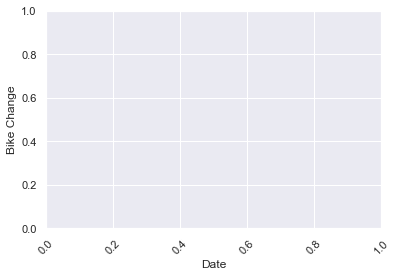

In [39]:
plt.ylabel('Bike Change')
plt.xlabel('Date')
plt.xticks(rotation=45)

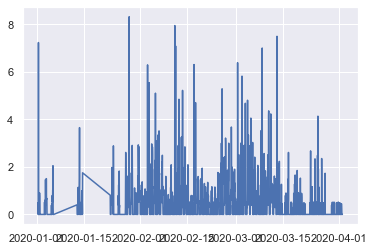

In [74]:
plt.plot(Data.index, Data["James St"],)

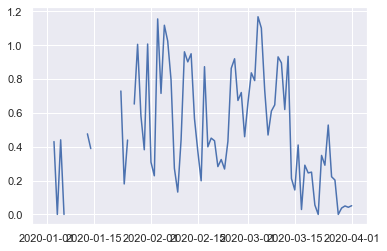

In [46]:
plt.plot(dailymean.index, dailymean['James St'], )

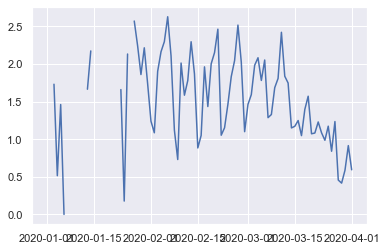

In [47]:
plt.plot(dailymean.index, dailymean['Grand Canal Dock'], )

In [54]:
train = dailymean[dailymean.index < pd.to_datetime("2020-03-01", format='%Y-%m-%d')]
test = dailymean[dailymean.index > pd.to_datetime("2020-03-01", format='%Y-%m-%d')]


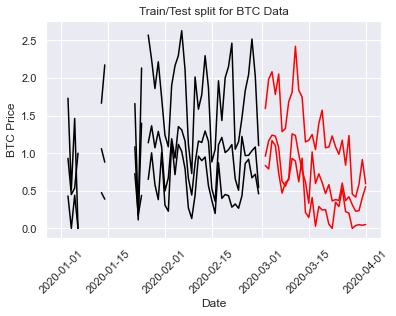

In [55]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  0.3739802928334336


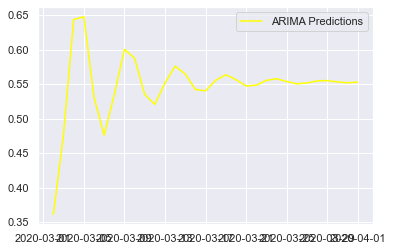

In [72]:
from statsmodels.tsa.arima.model import ARIMA

y = train['James St']

ARIMAmodel = ARIMA(y, order = (2, 1, 4))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(test["James St"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

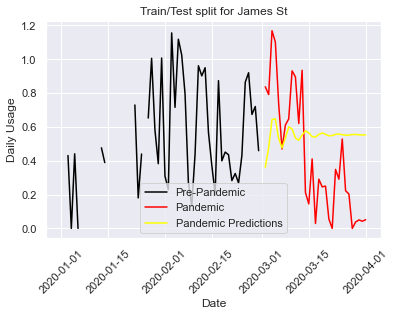

In [73]:
plt.plot(train['James St'] , color = "black", label = "Pre-Pandemic")
plt.plot(test['James St'] , color = "red", label = "Pandemic")
plt.plot(y_pred_out, color='Yellow', label = 'Pandemic Predictions')

plt.ylabel('Daily Usage')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for James St")
plt.legend()
plt.show()